In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krishna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krishna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/krishna/nltk_data...
[nltk_data] Downloading package punkt to /Users/krishna/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
dataset = pd.read_csv("BBC News Train.csv")

In [4]:
dataset.shape

(1490, 3)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
dataset["Category"].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [7]:
target_category = dataset['Category'].unique()
target_category

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [8]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [9]:
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


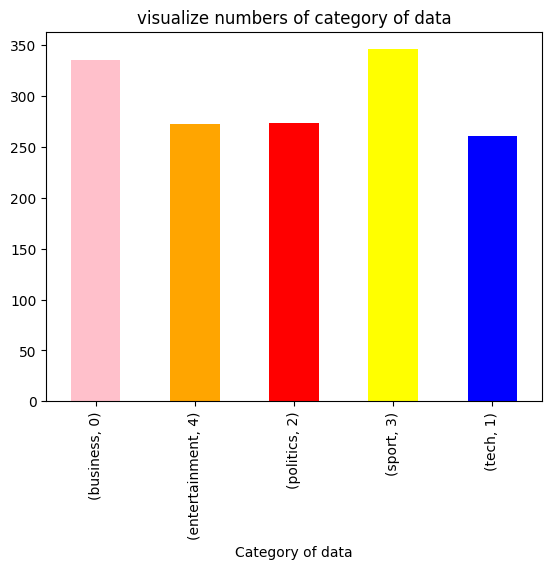

In [10]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("visualize numbers of category of data")
plt.show()

In [11]:
fig = plt.figure(figsize=(5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId']==0]
tech = dataset[dataset['CategoryId'] == 1]

<Figure size 500x500 with 0 Axes>

In [12]:
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics["CategoryId"].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]

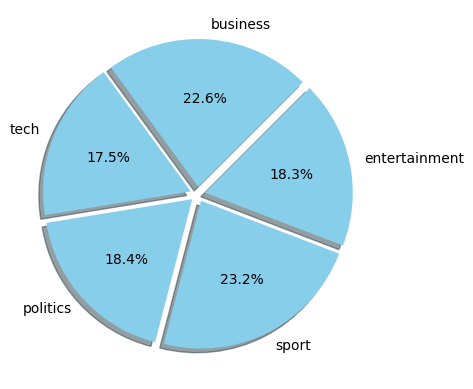

In [13]:
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05, 0.05))

In [14]:
from wordcloud import wordcloud

In [15]:
stop = set(stopwords.words('engish'))
business = dataset[dataset['categoryId'] == 0]
business = business['Text']
tech = dataset[dataset['CategoryId'] == 1]
politics = dataset[dataset['CategoryId'] == 2]
politics = politics['Text']
sport = dataset[dataset['CategoryId'] == 3]
sport = sport['Text']
entertainment = dataset[dataset['CategoryId'] == 4]
def wordcloud_draw(dataset, color = 'white'):
    words = ''.join(dataset)
    cleaned_word = "".join([word for word in words.split()
    if (word!= "news" and word!='text')])
    wordcloud = WordCloud(stopwords = stop, 
                          background_color=color,
                          width = 2500, height= 2500). generate(cleaned_word)
plt.figure(1, figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
print("business related words:")
wordcloud_draw(business)

OSError: No such file or directory: '/Users/krishna/nltk_data/corpora/stopwords/engish'